In [32]:
import numpy as np
import cv2, os, random
from matplotlib import pyplot as plt
from collections import Counter


# 1 pkm card size pixel = 2078(h) x 1488(w)
# 1 cm ~ 236.2 pixels
# dpi = 600
# Naming Convention
# Oringinal image: [Card type]_[Index][Frontside/Backside]_[Card no.]_[Total Card no.]_[Card Rarity]_[Eng/Chi/Jp].jpg
# E.g. PKM_016F_179_196_U_Chi.jpg

# **Remarks:
# [PKM]: Energy card: [Card type]_[Index][Frontside/Backside]_[Energy Type]_[Card Rarity]_[Eng/Chi/Jp].jpg

True

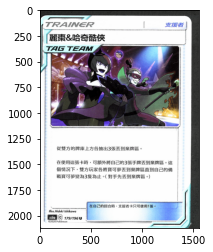

In [33]:

img_path = './Data/batch01.jpg'
x = [170, 1870, 3570, 5270]
y = [300, 2700, 5100, 7500]
h = 2120
w = 1550

img = cv2.imread(img_path)
crop_img = img[y[3]:y[3]+h, x[3]:x[3]+w] #crop
#result_BGR = cv2.cvtColor(crop_img, cv2.COLOR_RGB2BGR) #to rgb

plt.imshow(crop_img)
cv2.imwrite('./OriginalImages/PKM_179_196_U_Chi_016F.jpg', crop_img)
